<a href="https://colab.research.google.com/github/IqmanS/NLP-Assignments/blob/main/NLP_in_Python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [1]:
!wget https://github.com/IqmanS/NLP-Assignments/raw/main/data/dtm.pkl -q
!wget https://github.com/IqmanS/NLP-Assignments/raw/main/data/cv.pkl -q
!wget https://github.com/IqmanS/NLP-Assignments/raw/main/data/corpus.pkl -q
!wget https://github.com/IqmanS/NLP-Assignments/raw/main/data/data_clean.pkl -q

In [2]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('/content/dtm.pkl')
data = data.transpose()
data.head()

,ali,amy,anthony,beth,bill,burr,dave,dylan,hasan,jim,...,kevin,lewis,louis,matt,mike,pete,ricky,sammy,trevor,wanda
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
aaaaah,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,...,1,0,3,1,0,1,0,0,0,2
ab,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict["dave"]

[('like', 103),
 ('know', 79),
 ('said', 63),
 ('just', 61),
 ('im', 47),
 ('shit', 45),
 ('people', 43),
 ('didnt', 39),
 ('dont', 38),
 ('ahah', 38),
 ('time', 36),
 ('fuck', 33),
 ('thats', 33),
 ('fucking', 32),
 ('man', 31),
 ('black', 31),
 ('good', 27),
 ('got', 27),
 ('right', 22),
 ('gonna', 21),
 ('lot', 20),
 ('dave', 20),
 ('gay', 20),
 ('did', 19),
 ('hes', 19),
 ('yeah', 19),
 ('oj', 19),
 ('oh', 18),
 ('chappelle', 17),
 ('come', 17)]

In [4]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---'*10)

ali
like, im, just, know, dont, shit, thats, youre, gonna, ok, lot, oh, gotta, wanna
------------------------------
amy
like, know, just, im, okay, dont, right, uh, thats, youre, yeah, hes, said, think
------------------------------
anthony
im, like, know, dont, joke, got, said, thats, anthony, just, say, day, people, guys
------------------------------
beth
like, just, dont, know, im, think, youre, going, feel, people, got, sex, woman, theyre
------------------------------
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
------------------------------
burr
like, fcking, just, right, know, im, gonna, dont, yeah, youre, sht, fck, thats, shes
------------------------------
dave
like, know, said, just, im, shit, people, didnt, dont, ahah, time, fuck, thats, fucking
------------------------------
dylan
know, people, just, thats, dont, going, im, like, youre, look, cause, time, really, oh
------------------------------
hasan
like, guys, know, trump

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words[:10]

['like', 'im', 'just', 'know', 'dont', 'shit', 'thats', 'youre', 'gonna', 'ok']

In [6]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 23),
 ('im', 23),
 ('just', 23),
 ('know', 23),
 ('dont', 23),
 ('thats', 23),
 ('youre', 21),
 ('right', 21),
 ('people', 20),
 ('think', 19),
 ('got', 18),
 ('gonna', 16),
 ('time', 15),
 ('yeah', 15),
 ('oh', 14),
 ('said', 14),
 ('hes', 13),
 ('theyre', 13),
 ('going', 12),
 ('cause', 11),
 ('say', 11),
 ('really', 10),
 ('want', 10),
 ('didnt', 10),
 ('shit', 9),
 ('fuck', 9),
 ('good', 9),
 ('did', 9),
 ('okay', 8),
 ('thing', 8),
 ('theres', 8),
 ('man', 8),
 ('day', 7),
 ('fucking', 7),
 ('tell', 6),
 ('look', 6),
 ('little', 6),
 ('come', 6),
 ('lot', 5),
 ('ive', 5),
 ('guy', 5),
 ('goes', 5),
 ('uh', 4),
 ('life', 4),
 ('joke', 4),
 ('white', 4),
 ('mean', 4),
 ('ok', 3),
 ('thank', 3),
 ('love', 3),
 ('way', 3),
 ('doing', 3),
 ('mom', 3),
 ('dude', 3),
 ('shes', 3),
 ('house', 3),
 ('went', 3),
 ('kids', 3),
 ('hey', 3),
 ('gotta', 2),
 ('wanna', 2),
 ('husband', 2),
 ('women', 2),
 ('need', 2),
 ('feel', 2),
 ('guys', 2),
 ('dad', 2),
 ('saying', 2),
 ('make', 2

In [7]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 11]
add_stop_words

['like',
 'im',
 'just',
 'know',
 'dont',
 'thats',
 'youre',
 'right',
 'people',
 'think',
 'got',
 'gonna',
 'time',
 'yeah',
 'oh',
 'said',
 'hes',
 'theyre',
 'going']

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=list(stop_words))
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [9]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="black", colormap="twilight", max_font_size=150, random_state=42)


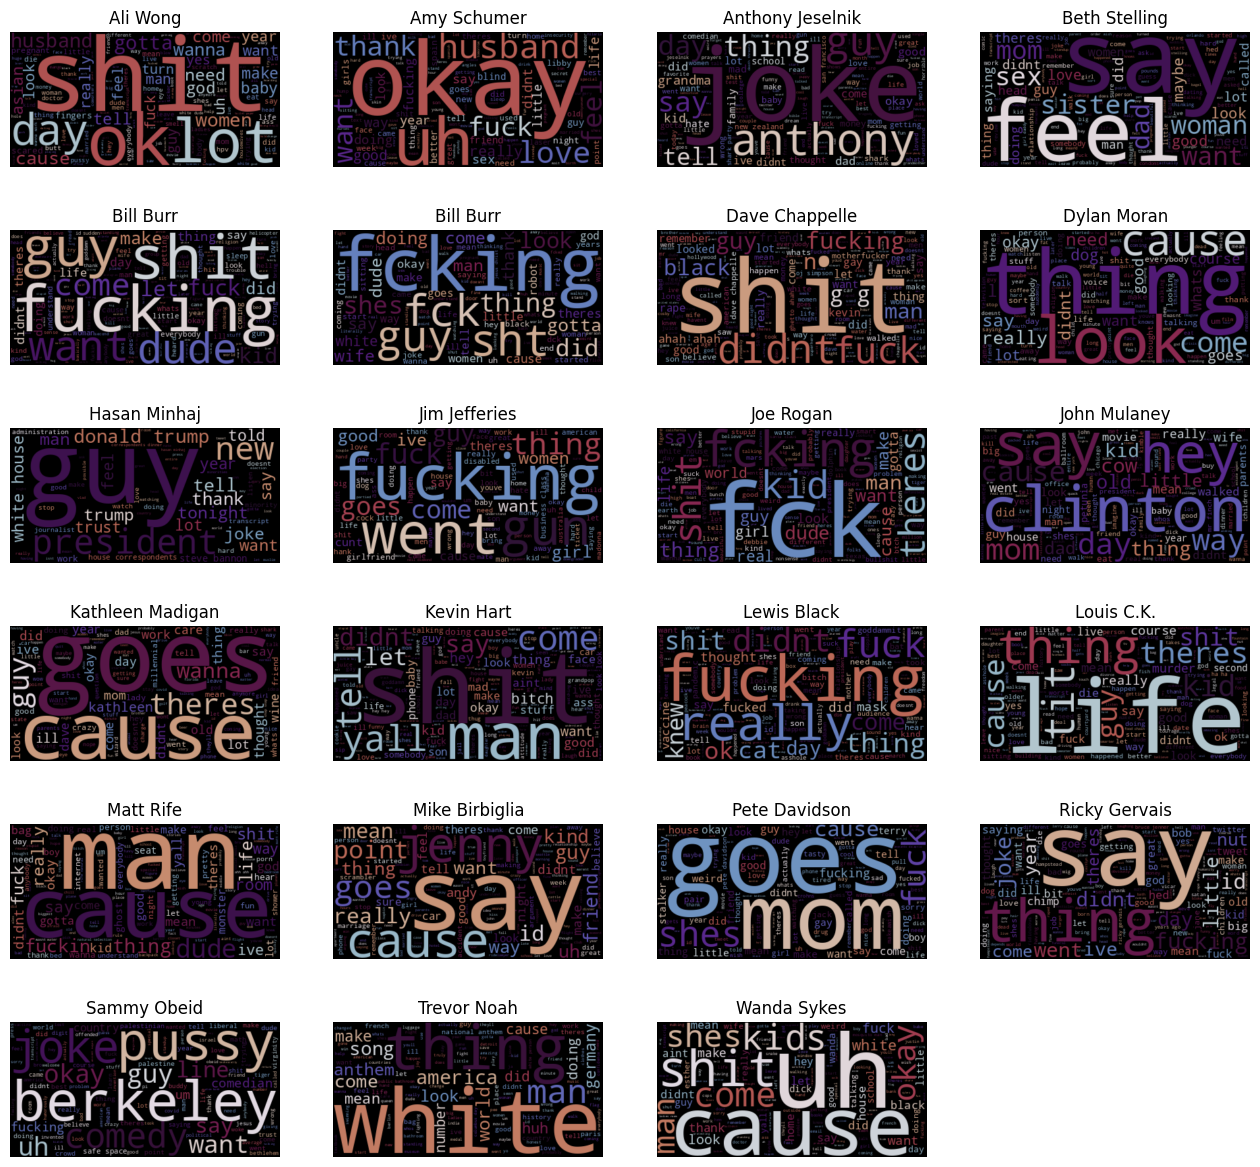

In [10]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 15]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Dave Chappelle', 'Hasan Minhaj', 'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia',
              'Pete Davidson','Ricky Gervais', 'Trevor Noah',"Matt Rife","Beth Stelling","Sammy Obeid","Amy Schumer","Bill Budd","Dylan Moran","Kevin Hart","Lewis Black","Kathleen Madigan","Wanda Sykes"]
full_names.sort()

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(6, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

### Findings

Favourites Words of:
1. Ali: shit
2. Amy: okay
3. Anthony: joke
4. Beth: feel and say
5. Bill: fucking and shit
6. Dave: shit
7. Dylan: thing
8. Hasan: guy
9. Jim: fucking and went
10. Joe: fuck
11. John clinton
12. Kathleen: cause
13. Kevin: shit
14. Lewis: fucking
15. Louis: life
16. Matt: man and cause
17. Mike: say and cause
18. Pete: goes and mom
19. Ricky: say
20. Sammy: pussy
21. Trevor: white
22. Wanda: uh and cause

## Number of Words

### Analysis

In [11]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
8,Hasan Minhaj,941
1,Amy Schumer,1089
2,Anthony Jeselnik,1154
15,Louis C.K.,1248
20,Sammy Obeid,1267
14,Lewis Black,1276
13,Kevin Hart,1290
22,Wanda Sykes,1324
18,Pete Davidson,1329
21,Trevor Noah,1344


In [12]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79, 60, 68, 65, 60, 62, 70, 72, 82, 60, 69, 85]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
8,Hasan Minhaj,941,1801,62,29.048387
2,Anthony Jeselnik,1154,3190,80,39.875000
22,Wanda Sykes,1324,3585,85,42.176471
1,Amy Schumer,1089,2623,59,44.457627
14,Lewis Black,1276,3425,65,52.692308
11,John Mulaney,1541,4251,79,53.810127
20,Sammy Obeid,1267,3281,60,54.683333
18,Pete Davidson,1329,4021,72,55.847222
6,Dave Chappelle,1542,4302,77,55.870130
0,Ali Wong,1488,3508,60,58.466667


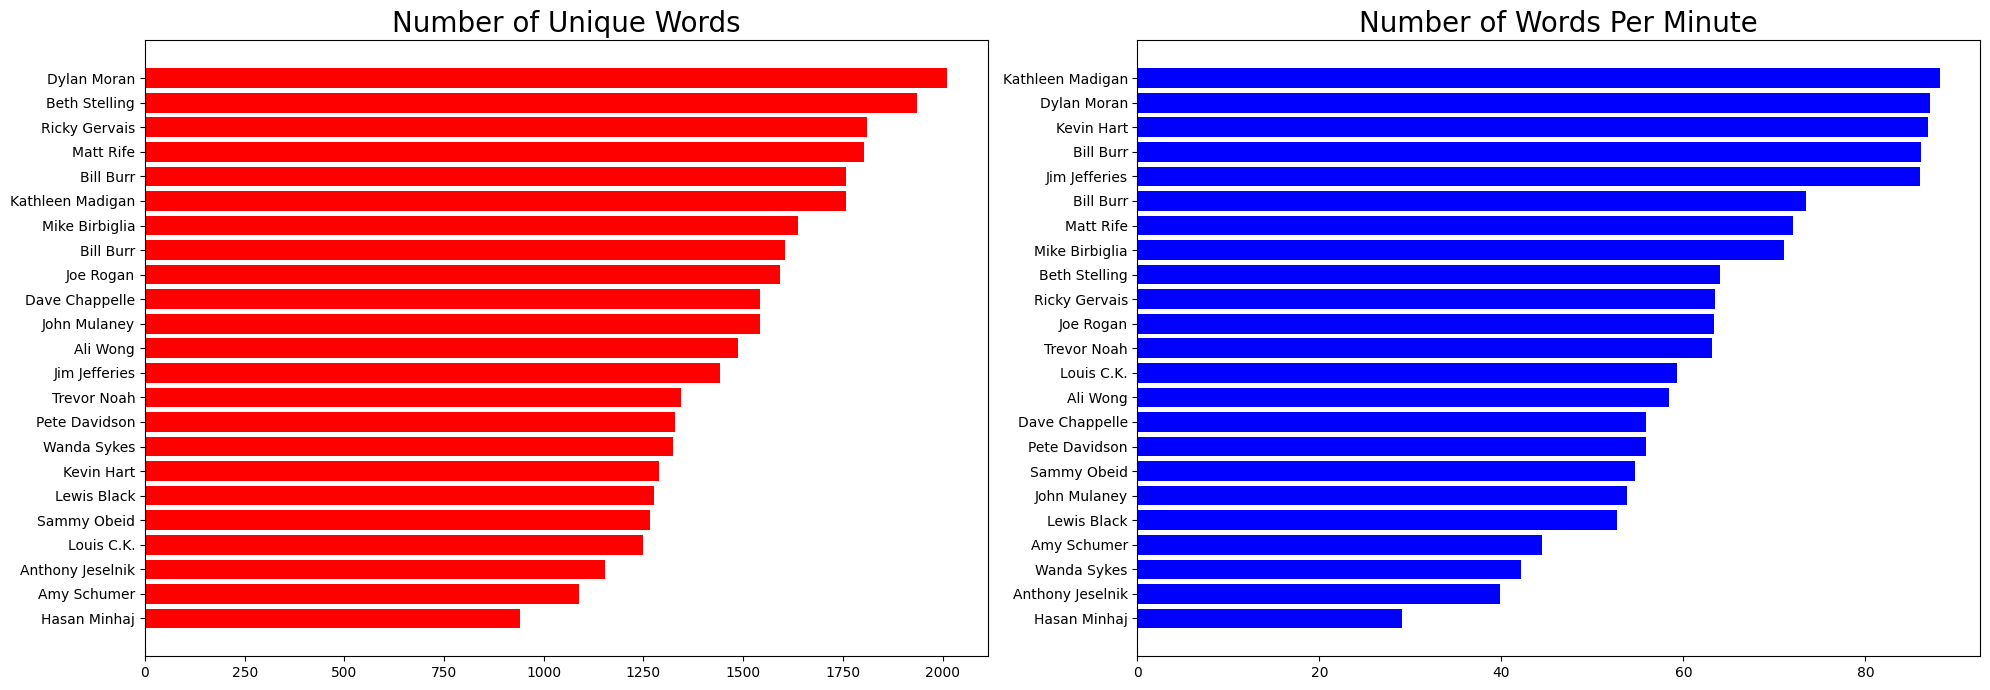

In [13]:
# Let's plot our findings
plt.figure(figsize=(20,7))

import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center',color="red")
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center',color="blue")
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [22]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()[:20]

[('like', 23),
 ('im', 23),
 ('just', 23),
 ('know', 23),
 ('dont', 23),
 ('thats', 23),
 ('youre', 21),
 ('right', 21),
 ('people', 20),
 ('think', 19),
 ('got', 18),
 ('gonna', 16),
 ('time', 15),
 ('yeah', 15),
 ('oh', 14),
 ('said', 14),
 ('hes', 13),
 ('theyre', 13),
 ('going', 12),
 ('cause', 11)]

In [24]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'fck', 'fcking', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fcking + data_bad_words.fck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity.head()

,f_word,s_word
ali,16,34
amy,23,5
anthony,15,9
beth,7,0
bill,107,64


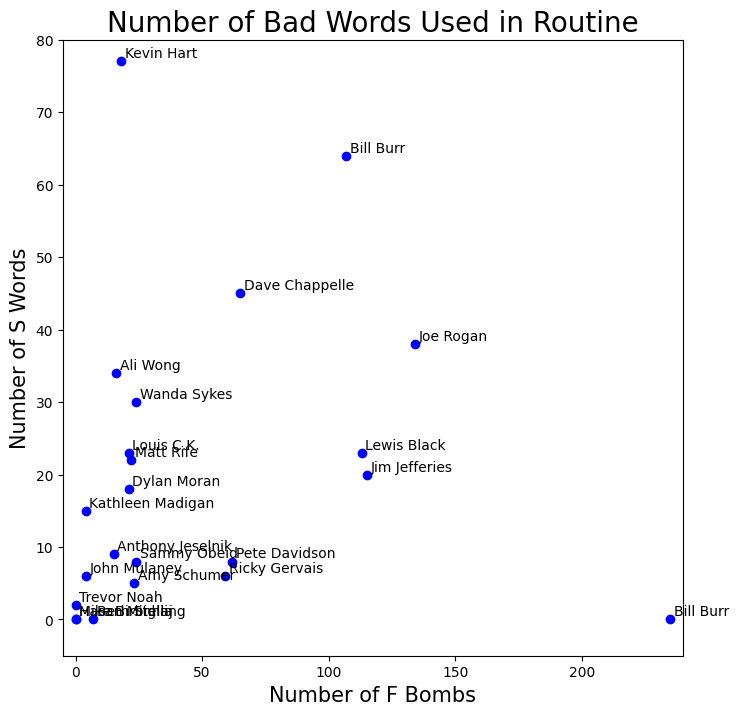

In [28]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [8, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 240)
    plt.ylim(-5, 80)

plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

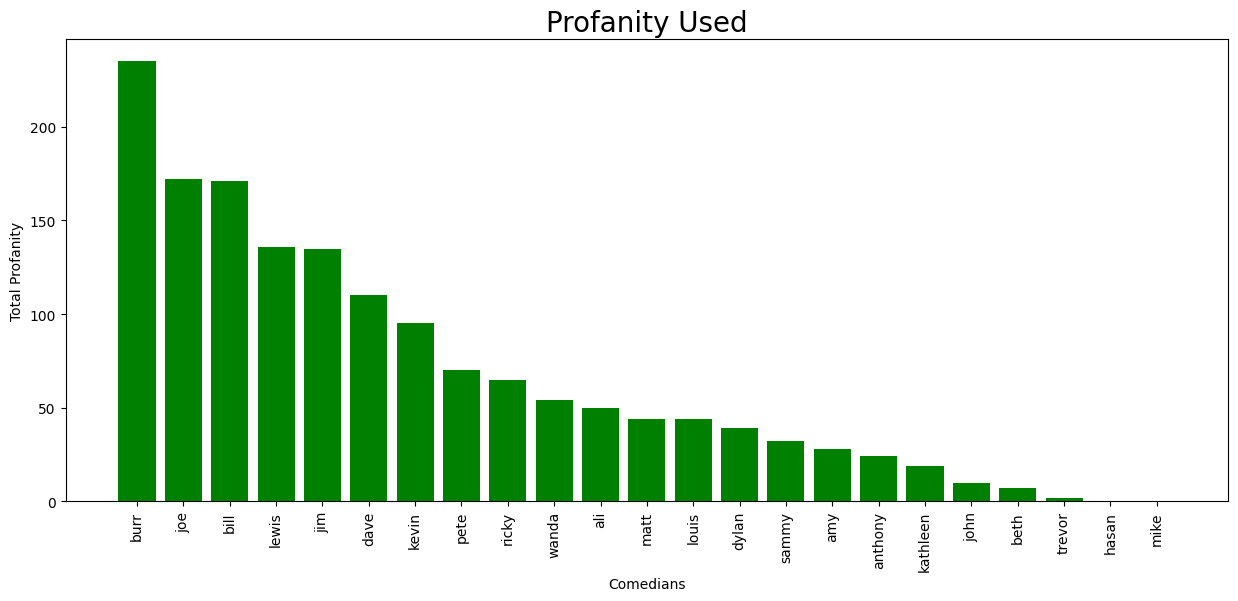

In [50]:
plt.figure(figsize=(15,6))

plt.title('Profanity Used', fontsize=20)
data_profanity["total"] = data_profanity["f_word"]+data_profanity["s_word"]
data_profanity.sort_values("total",ascending=False,inplace=True)
plt.bar(data_profanity.index, data_profanity["total"], align='center',color="green")
plt.xlabel("Comedians")
plt.ylabel("Total Profanity")
plt.xticks(rotation=90);

### Findings

* **High Profanity** - Kevin Hart, Jow Rogan and Bill Burr
* **Clean Humor** - Trevor Noah, Hasan Minaj.

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [17]:
data_gender = data.transpose()[["man","guy","dude","husband","dad","hes","mom","woman","women","wife","shes"]]
data_gender.head(10)

,man,guy,dude,husband,dad,hes,mom,woman,women,wife,shes
ali,9,3,12,20,2,14,9,7,17,0,8
amy,2,5,0,15,2,20,4,2,5,2,5
anthony,3,7,1,1,12,2,11,1,9,0,1
beth,8,4,5,2,14,10,13,16,10,2,1
bill,21,30,40,0,6,31,2,15,5,9,13
burr,22,22,21,1,5,26,3,13,17,22,35
dave,31,14,7,1,3,19,0,12,14,9,2
dylan,12,6,0,0,9,10,0,12,15,10,6
hasan,10,2,0,0,2,8,0,1,0,1,3
jim,20,21,1,0,2,23,0,7,26,3,16


In [18]:
data_man_woman = pd.concat([data_gender[["man","guy","dude","husband","dad","hes"]].sum(axis=1), data_gender[["mom","woman","women","wife","shes"]].sum(axis=1)], axis=1)
data_man_woman.columns = ['man', 'woman']
data_man_woman.head()

,man,woman
ali,60,41
amy,44,18
anthony,26,22
beth,43,42
bill,128,44


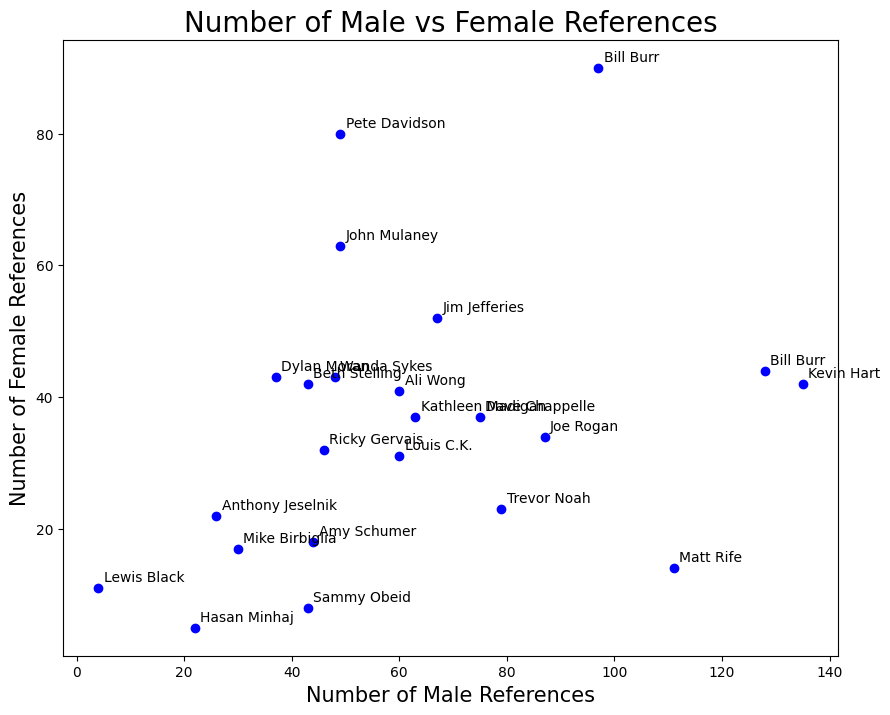

In [19]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_man_woman.man.loc[comedian]
    y = data_man_woman.woman.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1, y+1, full_names[i], fontsize=10)

plt.title('Number of Male vs Female References', fontsize=20)
plt.xlabel('Number of Male References', fontsize=15)
plt.ylabel('Number of Female References', fontsize=15)

plt.show()